# Interpolation polynomiale

In [1]:
%pylab inline
import time
from math import *
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 1 - Comparaison de deux méthodes d'évaluation de polynômes


### Méthode naïve
On veut évaluer, en un $c$ donné, le polynôme $p$ défini par 
$$
p(x) = a_0 + a_1 x +a_2 x^2 + ... + a_{n-1} x^{n-1}+  a_n x^n.
$$

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p1(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ le plus naïvement possible.

On pourra vérifier que l'évaluation de $p(x) = 1+2x+3x^2$ en $c = 5$ vaut $86$.

In [2]:
def p1(c,a):
    deg = len(a)-1
    p = 0
    for i in range(deg,-1,-1):
        p = p+a[i]*c**i
    return p

a = [1,2,3]
c = 5
p1(c,a)

86

### Algorithme de Hörner

On rappelle l'algorithme de Hörner vu en TD : si on définit la suite $(b_k)_{k = 0, ..., n}$ par
$$
\left\{
\begin{array}{rcll}
b_n & = & a_n\\
b_k & = & b_{k+1} c +a_k & \forall k = n-1, n-2, ..., 1, 0.
\end{array}
\right.
$$
On peut montrer que $p(x) = (x-c)(b_n x^{n-1}+b_{n-1}x^{n-2}+...+b_2 x+b_1)+b_0$ et donc que $p(c) = b_0$.

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p2(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ en utilisant l'algorithme de Hörner.

In [3]:
def p2(c,a):
    deg = len(a)-1
    bk = 0
    for k in range(deg,-1,-1):
        bnew = bk*c+a[k]
        bk = bnew
    return bk

p2(c,a)

86

### Comparaison

Dans le code ci-dessous, on compare les temps de calcul, en un vecteur $c$ de taille $1000$, des deux algorithmes précédents (naïf et Hörner) pour des degrés de polynôme croissants. Qu'en concluez-vous ?

Text(0, 0.5, "temps d'évaluation du polynôme, en secondes")

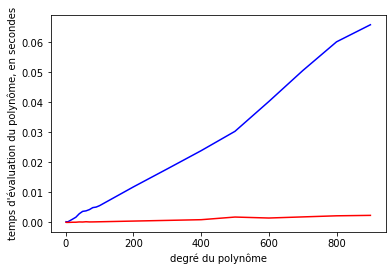

In [4]:
c = rand(1000,1)
tps1 = []
tps2 = []
abscisses = []
for n in range(1,10,1):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(10,100,10):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(100,1000,100):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)

plot(abscisses,tps1,color='b')
plot(abscisses,tps2,color='r')
xlabel("degré du polynôme")
ylabel("temps d'évaluation du polynôme, en secondes")

## 2 - Quelques préliminaires


### Subdivision régulière

**Question** : écrire une fonction **equirep** qui prend $a$, $b$ et $d$ comme arguments et qui produit $d+1$ points $a_0 = a$, $a_1$, ..., $a_d = b$ équirépartis dans l'intervalle $[a,b]$.

Vérifier que **equirep(-1,1,5)** retourne **[-1.  -0.6 -0.2  0.2  0.6  1. ]**.

In [5]:
def equirep(a,b,d):
    x = linspace(a,b,d+1)
    return x

print(equirep(-1,1,5))

[-1.  -0.6 -0.2  0.2  0.6  1. ]


### Une première fonction test

**Question** : écrire une fonction **jolie** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $f$ définie sur $\mathbb{R}$ par $f(x) = x\sin(\pi x).$

On pourra vérifier que **jolie([-1.5,0,1.5,2]) = [ -1.50000000e+00   0.00000000e+00  -1.50000000e+00  -4.89858720e-16]**.

In [6]:
def jolie(x):
    n = len(x)
    f = zeros(n)
    for i in range(n):
        xi = x[i]
        f[i] = xi*sin(pi*xi)
    return f

x = [-1.5,0,1.5,2]
y = jolie(x)
print(y)

[-1.5000000e+00  0.0000000e+00 -1.5000000e+00 -4.8985872e-16]


**Question** : En utilisant **equirep** et **jolie**, tracer en bleu la fonction $f$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

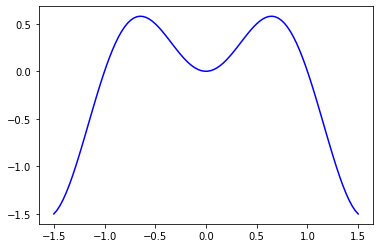

In [7]:
a = -1.5
b = 1.5
x = linspace(a,b,100)
y = jolie(x)
plot(x,y,'b-')

### Une seconde fonction test

**Question** : écrire une fonction **cloche** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $g$ définie sur $\mathbb{R}$ par
$$
g(x) = \dfrac{1}{1+100 x^2}.
$$

On pourra vérifier que **cloche([-1,0,1,2]) = [ 0.00990099  1.          0.00990099  0.00249377]**.

In [8]:
def cloche(x):
    n = len(x)
    f = zeros(n)
    for i in range(n):
        f[i] = 1./(1+100*x[i]**2)
    return f

x = [-1,0,1,2]
y = cloche(x)
print(y)

[0.00990099 1.         0.00990099 0.00249377]


**Question** : En utilisant **equirep** et **cloche**, tracer en rouge la fonction $g$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

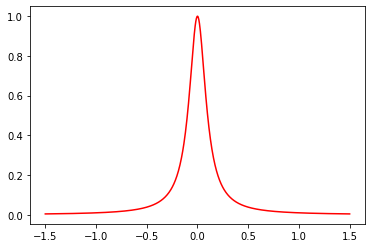

In [9]:
a = -1.5
b = 1.5
x = linspace(a,b,1000)
y = cloche(x)
figure(1)
plot(x,y,'r-')

## 3 - Construction de la forme de Lagrange du polynôme d'interpolation

On rappelle que l'unique polynôme $p$ de degré $\leq d$ tel que 
$p(a_i) = f_i$, $\forall i = 0, ..., d$, 
est donné, $\forall x \in \mathbb{R}$, par la formule
$$
p(x) = \sum_{j = 0}^{d} f_{j} l_{j,d}(x) 
\mbox{ avec } 
l_{j,d}(x) = \prod_{\stackrel{k = 0}{k\neq j}}^{d} \dfrac{x-a_k}{a_j-a_k}.
$$

**Question** : écrire une fonction **lagrange** qui prend un réel $c$ et 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit le réel $p(c)$. 
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **lagrange(avec[i],avec,fvec)** retourne $fvec[i]$ pour $i = 0,1,2$.

In [10]:
def lagrange(x,avec,fvec):
    d = len(avec)-1
    P = 0
    for j in range(d+1):
        L = 1
        aj = avec[j]
        for k in range(j):
            ak = avec[k]
            L = L*(x-ak)/(aj-ak)
        for k in range(j+1,d+1):
            ak = avec[k]
            L = L*(x-ak)/(aj-ak)
        P = P+fvec[j]*L
    return P

avec = [0,1,2]
fvec = [0,1,4]
for i in range(3):
    print(lagrange(avec[i],avec,fvec),fvec[i])

0.0 0
1.0 1
4.0 4


**Question** : écrire une fonction **trace_e** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points équidistants **en bleu** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

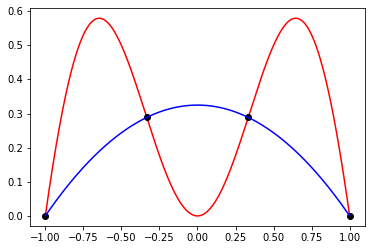

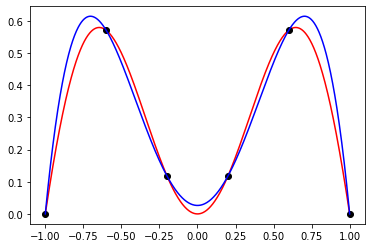

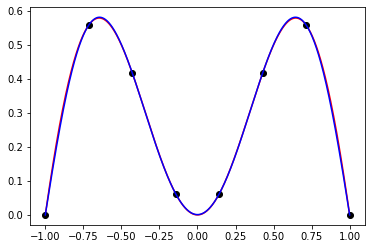

In [11]:
def trace_e(a,b,d,fonc):
    #pour tracer
    n = 1000
    x = equirep(a,b,n)
    plot(x,fonc(x),'r-')
    
    avec = equirep(a,b,d)
    fvec = fonc(avec)
    plot(avec,fvec,'ok')
    Px = zeros(size(x))
    for i in range(len(x)):
        Px[i] = lagrange(x[i],avec,fvec)
    plot(x,Px,'b-')

figure()
trace_e(-1,1,3,jolie)
figure()
trace_e(-1,1,5,jolie)
figure()
trace_e(-1,1,7,jolie)

**Question** : tester maintenant **trace_e** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

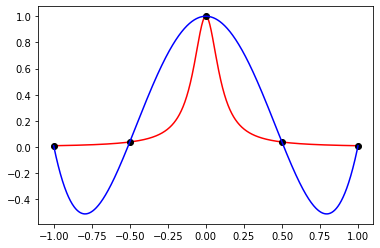

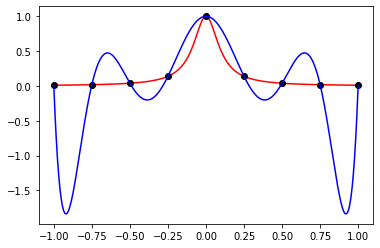

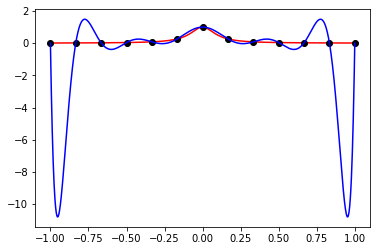

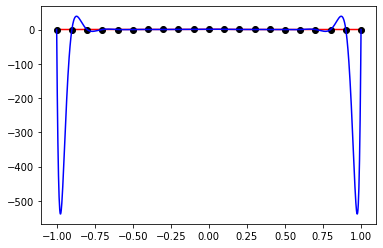

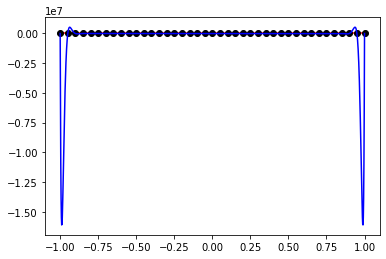

In [12]:
figure()
trace_e(-1,1,4,cloche)
figure()
trace_e(-1,1,8,cloche)
figure()
trace_e(-1,1,12,cloche)
figure()
trace_e(-1,1,20,cloche)
figure()
trace_e(-1,1,40,cloche)

## 4 - Points de Chebyshev

Les points de Chebyshev dans l'intervalle $[a,b]$ sont donnés par la formule suivante : 
$$
a_i = \dfrac{a+b}{2}+\dfrac{b-a}{2}\cos\left(\dfrac{2i+1}{2(d+1)}\pi\right), 
\quad i = 0, ..., d.
$$

**Question** : écrire une fonction **cheb** qui prend $a$, $b$ et $d$ comme arguments et qui produit les $d+1$ points de Chebyshev dans l'intervalle $[a,b]$.

Vérifier que **cheb(-1,1,5)** retourne **[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]**.

In [13]:
def cheb(a,b,d):
    mil = (a+b)/2.
    demil = (b-a)/2.
    den = 2.*(d+1)
    x = zeros(d+1)
    for i in range(d+1):
        x[i] = mil+demil*cos(pi*(2*i+1)/den)
    return sort(x)

print(cheb(-1,1,5))

[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]


**Question** : tracer les deux suvdivisions de l'intervalle $[5,10]$ de 2 couleurs différentes, afin de comprendre la différence entre les deux.

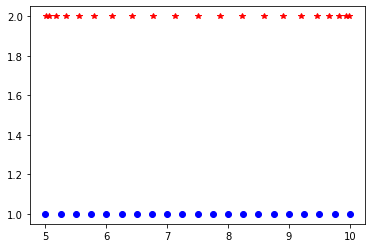

In [14]:
a = 5
b = 10
d = 20
xe = equirep(a,b,d)
xc = cheb(a,b,d)
ee = ones((d+1,1))
plot(xe,ee,'ob')
plot(xc,2*ee,'*r')

**Question** : écrire une fonction **trace_c** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points de Chebyshev **en vert** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

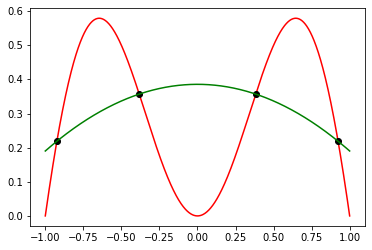

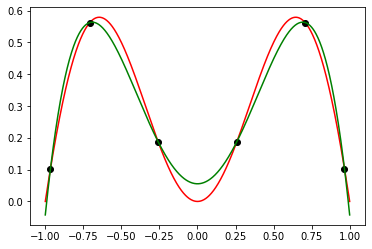

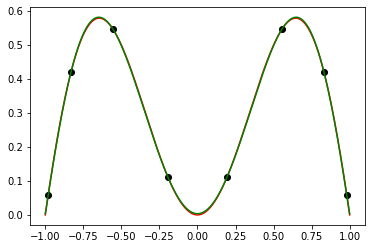

In [15]:
def trace_c(a,b,d,fonc):
    #pour tracer
    n = 1000
    x = equirep(a,b,n)
    plot(x,fonc(x),'r-')
    
    avec = cheb(a,b,d)
    fvec = fonc(avec)
    plot(avec,fvec,'ok')
    Px = zeros(size(x))
    for i in range(len(x)):
        Px[i] = lagrange(x[i],avec,fvec)
    plot(x,Px,'g-')

figure()
trace_c(-1,1,3,jolie)
figure()
trace_c(-1,1,5,jolie)
figure()
trace_c(-1,1,7,jolie)

**Question** : tester maintenant **trace_c** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

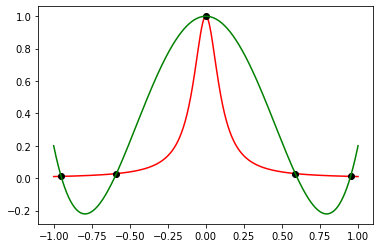

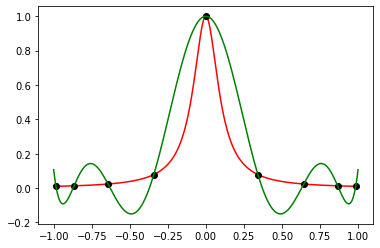

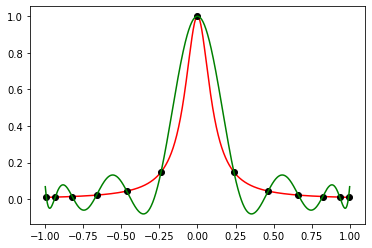

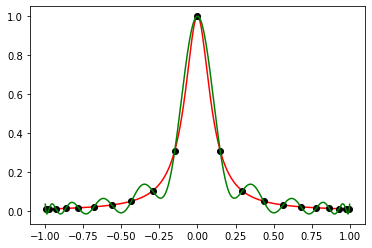

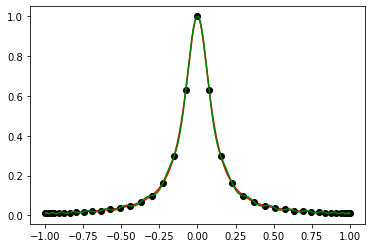

In [16]:
figure()
trace_c(-1,1,4,cloche)
figure()
trace_c(-1,1,8,cloche)
figure()
trace_c(-1,1,12,cloche)
figure()
trace_c(-1,1,20,cloche)
figure()
trace_c(-1,1,40,cloche)

## 5 - Différences divisées et forme de Newton

Nous allons maintenant programmer la forme de Newton du polynôme d'interpolation de Lagrange. 

Pour ce faire, nous allons commencer par écrire une fonction **DD** qui prend 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit la matrice des différences divisées.

On rappelle que les différences divisées s'obtiennent par récurrence : pour tout entier $l\geq 1$, 
$$
f[a_0, a_1, ..., a_l] = \dfrac{f[a_1, a_2, ..., a_l]-f[a_0, a_1, ..., a_{l-1}]}{a_l-a_0}.
$$

In [17]:
def DD(avec,fvec):
    d = len(avec)-1
    D = zeros([d+1,d+1])
    j = 0
    for i in range(d+1):
        D[i,j] = fvec[i]
    for j in range(1,d+1):
        for i in range(j,d+1):
            num = D[i,j-1]-D[i-1,j-1]
            den = avec[i]-avec[i-j]
            D[i,j] = num/den
    return D

On construit maintenant une fonction **newton** qui prend comme arguments d'entrée 
+ le vecteur $avec$ contenant les abscisses $a_i$, 
+ la matrice $D$ des différences divisées associées 
+ et un scalaire $c$  

et qui produit le scalaire $p(c)$ en utilisant la forme de Newton du polynôme d'interpolation de Lagrange. 

On rappelle ci-dessous l'algorithme qui permet de calculer $P := p(c)$ connaissant $avec$, $f$, $D$ et $c$ :

+ $P = 0$
+ $\pi = 1$
+ Pour $j$ de $0$ à $d$ faire
    + $P = P+D_{j,j}\times\pi$ 
    + $\pi = \pi\times (c-a_j)$
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **newton(avec[i],avec,fvec)** retourne $fvec[i]$ pour $i = 0,1,2$.

In [18]:
def newton(x,avec,D):
    d = len(avec)-1
    P = 0
    pii = 1
    for j in range(d+1):
        P = P+D[j,j]*pii
        pii = pii*(x-avec[j])
    return P,pii

avec = [0,1,2]
fvec = [0,1,4]
D = DD(avec,fvec)
for i in range(3):
    P,pii = newton(avec[i],avec,D)
    print(P,fvec[i])

0.0 0
1.0 1
4.0 4


## 6 - Testons l'intérêt de la forme de Newton : l'ajout d'un point

Illustrons maintenant l'intérêt de la forme de Newton par rapport à celle de Lagrange, en voyant ce qui doit être modifié si on ajoute un point d'interpolation, c'est à dire si $avec$ et $fvec$ sont augmentés d'une case.

Pour ce faire on écrit une fonction **ajout_point(avec,fvec,D,u,v)** qui augmente 
+ le vecteur $avec$ de $u$,
+ le vecteur $fvec$ de $v$
+ et la matrice $D$ de la ligne correspondant à l'ajout du point d'interpolation $(u,v)$.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ utilisé à la question précédente.

In [19]:
def ajout_point(avec,fvec,D,u,v):    
    d = len(avec)-1
    
    avecnew = zeros(d+2)
    avecnew[0:d+1] = copy(avec)
    avecnew[d+1] = u
    
    fvecnew = zeros(d+2)
    fvecnew[0:d+1] = copy(fvec)
    fvecnew[d+1] = v
    
    Dnew = zeros([d+2,d+2])
    Dnew[0:d+1,0:d+1] = copy(D)
    i = d+1
    j = 0
    Dnew[i,j] = v
    for j in range(1,d+2):
        num = Dnew[i,j-1]-Dnew[i-1,j-1]
        den = avecnew[i]-avecnew[i-j]
        Dnew[i,j] = num/den    
    return avecnew,fvecnew,Dnew

avec = equirep(a,b,2)
fvec = cloche(avec)
D = DD(avec,fvec)

anew = 0.5
avecnew,fvecnew,Dnew = ajout_point(avec,fvec,D,anew,cloche([anew]))
print(avec)
print(avecnew)
print()
print (fvec)
print (fvecnew)
print ()
print (D)
print (Dnew)

[ 5.   7.5 10. ]
[ 5.   7.5 10.   0.5]

[3.99840064e-04 1.77746178e-04 9.99900010e-05]
[3.99840064e-04 1.77746178e-04 9.99900010e-05 3.84615385e-02]

[[ 3.99840064e-04  0.00000000e+00  0.00000000e+00]
 [ 1.77746178e-04 -8.88375542e-05  0.00000000e+00]
 [ 9.99900010e-05 -3.11024710e-05  1.15470166e-05]]
[[ 3.99840064e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.77746178e-04 -8.88375542e-05  0.00000000e+00  0.00000000e+00]
 [ 9.99900010e-05 -3.11024710e-05  1.15470166e-05  0.00000000e+00]
 [ 3.84615385e-02 -4.03805773e-03  5.72422180e-04 -1.24638925e-04]]


On construit une fonction **newton_ap(avecnew,Dnew,P,pii,x)** qui met à jour la valeur $P$ du polynôme d'interpolation de Lagrange au point $x$ lorqu'on a ajouté le point $(u,v)$ aux points d'interpolation.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ et en comparant la valeur des 2 polynômes d'interpolation à la réponse de cloche, précisément en cette nouvelle abscisse.

In [20]:
def newton_ap(x,avecnew,Dnew,P,pii):
    d = len(avecnew)-1
    Pnew = P+Dnew[d,d]*pii
    piinew = pii*(x-avecnew[d])
    return Pnew,piinew

anew = 0.5
    
x = anew
P,pii = newton(x,avec,D)
print(P,cloche([x]))

u = anew
print ("u = ",u)
v = cloche([anew])
avecnew,fnew,Dnew = ajout_point(avec,fvec,D,u,v)
print ("Dnew = ",Dnew)
print ("avecnew = ",avecnew)
Pnew,piinew = newton_ap(x,avecnew,Dnew,P,pii)
print(Pnew,cloche([x]))

0.0011633400822166143 [0.03846154]
u =  0.5
Dnew =  [[ 3.99840064e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.77746178e-04 -8.88375542e-05  0.00000000e+00  0.00000000e+00]
 [ 9.99900010e-05 -3.11024710e-05  1.15470166e-05  0.00000000e+00]
 [ 3.84615385e-02 -4.03805773e-03  5.72422180e-04 -1.24638925e-04]]
avecnew =  [ 5.   7.5 10.   0.5]
0.038461538461538464 [0.03846154]
